# Chapter 1. Introduction
> "NLP"

- toc:true
- branch: master
- badges: true
- comments: true
- author: 이강철
- hide : true
- categories: [python]

# NLP

* Natrual Language Processing

* 언어학 지식에 상관없이 텍스트를 **"이해"** 하는 통계적인 방법을 사용해 실전 문제를 해결하는 일련의 기술

* 텍스트 마이닝과의 차이 비교가 현재는 거의 무의미 하지만 아래와 같은 관심 중점에 차이가있다

`1` 텍스트 마이닝 : 텍스트 데이터로 부터 유의미한 정보를 추출

`2` NLP : 기계가 자연어를 이해할 수 있고 처리할 수 있도록 하는일을 의미한다.

*  여기서 이해라는 것은 주로 텍스트를 계산 가능한 **"표현(representation)"** 으로 변환함으로써 이루어짐

* 표현 : 벡터, 텐서, 그래프, 트리 같이 이산적이거나 연속적으로 조합한 구조이다.

* 이 책에서는 딥러닝과 NLP을 배운다.

# Deep learning

* 개념 : 계산 그래프와 수치 최적화 기술을 사용해 데이터에서 표현을 효과적으로 학습하는 기술

# Supervised Learning

* 목적 : 주어진 데이터 셋에서 손실 함수를 최소화하는 파라미터 값을 고르는 것

* 손실함수 : $L(\hat y,\,y)$

## 경사하강법

* Gradient descent : 식의 근을 찾는 일반적인 방법

### 전통적인 경사 하강법

* = batct gradient descent

* 오차를 구할 때 전체 데이터 셋을 고려 $\to$ 한 번에 에포크에서 모든 매개변수에 업데이트를 단 한번 수행

* 파라미터의 초깃값을 추측한 다음 목적 함수(= 손실 함수)의 값이 수용할만한 임계점(수렴 조건) 아래로 내려갈 때 까지 파라미터를 반복해서 업데이트를 한다.

* 데이터 셋이 클 경우 메모리 제약 $\to$ 계산 비용이 높아 매우 느림

### 확률적 경사하강법

* Stochastic gradient descent(SGD)

* 데이터 포인트를 하나 또는 일부 랜덤하게 선택하여 그래디언트를 계산한다.

* 데이터 포인트를 하나 사용하는 방법은 순수 SGD,  두 개 이상 사용하는 방법은 미니배치 SGD 라고 부른다.

* 순수 SGD : 업데이트에 잡음이 많아 수렴이 매우 느려 실전에서는 거의 사용하지 않음

## 역전파

* Backpropagation

* 파라미터를 반복적으로 업데이트 하는 과정

* 단계   = 정방향 계산 (forward pass) + 역방향 계산 (backward pass)

* 정방향 계산 : 현재 파라미터값으로 입력을 받아 평가하여 손실함수를 계산

* 역방향 계산 : 손실의 그래이디언트를 사용하여 파라미터를 업데이트 함.

# 원-핫 표현

## 사이킷런을 사용하여 원-핫 벡터 또는 이진 표현 만들기

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
corpus = ["Time flies like an arrow.","Fruit flies like a banana"]

In [30]:
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()

In [33]:
vocab = one_hot_vectorizer.get_feature_names()
vocab

['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']

<AxesSubplot:>

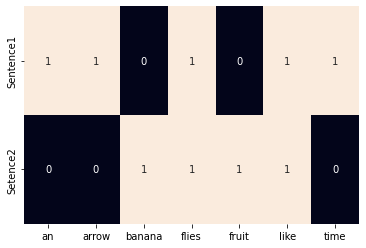

In [36]:
sns.heatmap(one_hot, annot = True,
           cbar = False, xticklabels = vocab,
           yticklabels = ["Sentence1", "Setence2"])

# TF-IDF 표현

$$TF(w) = Frequency\,\, of \,\,word$$

$$IDF(w) = \log\frac  {N}{n_w}$$

$$N : total\, document\quad n_w : number\,of\, documnet\, that\, include\,word $$

* $TF$ : $i$번째 문서에서 $j$ 번째 단어의 출현 횟수

* $IDF$ : 역문서 빈도, 단어 $w$가 출현한 역문서 빈도

* 사이킷런의 `TfidfVectorizer` 클래스에서는 단어를 모두 가상의 문서가 있는 것처럼 로그 안의 분모와 분자에 1을 더해서 분모가 0이 되는 상활을 방지함
    * 또한 마지막에 1을 더해 모든 문서에 포함된 단어가 있을 때 IDF 가 0이 되지 않도록함

$$IDF(w) = \log \left( \frac  {N+1}{n_w+1}\right ) + 1$$

 * 만약 특허와 관련된 문서 묶음이 있다고 가정해보자. 그러면 문서 대부분에 ["Claim", "System", "method"]  와 같은 단어가 여러번 반복해서 나온다.

* 이런 흔한 단어는 사실 특정 특허와 관련한 어떤 정보도 담겨있지 않는다.

* 반대로 "tetrafluoroethylene"(테트라플루오로에틸랜) 과 같이 희귀한 단어는 자주 나오지 않지만 특허 문서의 특징을 잘나타냄

* $TF(w) \times IDF(w)$이다. 즉 모든 문서에 등장하는 매우 흔한 단어는 TF-IDF 점수가 0이된다.

* 이처럼 아무런 정보없이 무분별하게 여러번 등장하는 단어들에 패널티를 주기위한 기법이다.

### 사이킷런을 사용해 TF-IDF 표현 만들기

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

In [40]:
tfidf_vectorizer = TfidfVectorizer()
tfidf =tfidf_vectorizer.fit_transform(corpus).toarray()
tfidf

array([[0.49922133, 0.49922133, 0.        , 0.35520009, 0.        ,
        0.35520009, 0.49922133],
       [0.        , 0.        , 0.57615236, 0.40993715, 0.57615236,
        0.40993715, 0.        ]])

<AxesSubplot:>

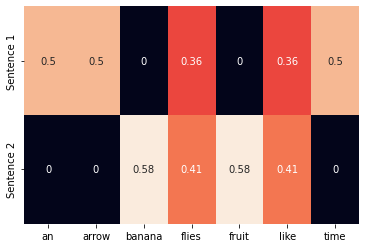

In [41]:
sns.heatmap(tfidf,annot=True,xticklabels=vocab,cbar=False, yticklabels=["Sentence 1", "Sentence 2"])

# 파이토치 기초

* 오픈 소스로 씨아노, 카페, 텐서플로와 달리 파이토치는 테이프 기반 자동 미분 방식을 구현한다.

* 위 방식은 계산 그래프를 동적으로 정의하고 실행할 수 있다. 또한 디버깅이 아주 편리하며 복잡한 모델을 손쉽게 만들게 해줌

* 텐서 : 다차원 데이터를 담은 수학객체

## 텐서 만들기

* 먼저 헬퍼 함수 `describe(x)`를 정의하여 텐서 타입, 차원, 값 같은 텐서의 속성을 출력

In [53]:
def describe(x) :
    print("타입 : {}".format(x.type()))
    print("크기 : {}".format(x.shape))
    print("값 : \n{}\n \n\n================================================\n\n".format(x))    

In [54]:
import torch

* 차원을 지정 후 텐서를 랜덤하게 초기화하는 방법

In [55]:
describe(torch.Tensor(2,3))

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[0.2582, 0.4032, 0.1510],
        [0.8588, 0.2966, 0.9982]])
 





## 균등분포와 표준정규분포

In [56]:
describe(torch.rand(2,3))  ## 균등 분포
describe(torch.randn(2,3)) ## 표준 정규 분포

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[0.6322, 0.4141, 0.1253],
        [0.5149, 0.2065, 0.5259]])
 



타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[-0.5282, -0.1808,  1.0561],
        [ 0.6534, -0.0688,  1.0356]])
 





## 동일한 스칼라값으로 채운 텐서를 만들기

* 내장함수로 0또는 1로 채운 텐서 생성

In [57]:
describe(torch.zeros(2,3))

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[0., 0., 0.],
        [0., 0., 0.]])
 





In [58]:
x = torch.ones(2,3)
describe(x)

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[1., 1., 1.],
        [1., 1., 1.]])
 





# 인-플레이스 메서드

* 인-플레이스  메서드 : 데이터를 직접 변경하는 것

* 아래와 같이 `fill_()` 메서드와 비슷하게 랜덤 샘플링에 유용한 인-플레이스 메서드가 잇다.

In [61]:
x.fill_(5)

tensor([[5., 5., 5.],
        [5., 5., 5.]])

In [62]:
describe(x)

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[5., 5., 5.],
        [5., 5., 5.]])
 





*  새로운 객체를 생성하지 않고 바로 값을 변환하는데 객체 지향적인 관점에서 별로 좋지는 않은 것 같다.

In [69]:
y = torch.Tensor(3,2)

In [70]:
y

tensor([[4.4155e-05, 2.1259e+20],
        [8.1714e+20, 6.7875e-07],
        [2.5668e-09, 4.1537e-08]])

In [71]:
y.uniform_()

tensor([[0.7345, 0.1133],
        [0.0873, 0.7492],
        [0.3604, 0.2273]])

In [72]:
y

tensor([[0.7345, 0.1133],
        [0.0873, 0.7492],
        [0.3604, 0.2273]])

In [73]:
y.normal_()

tensor([[ 0.3838, -0.6120],
        [-1.3810,  0.8169],
        [-0.6775, -1.2050]])

In [74]:
y

tensor([[ 0.3838, -0.6120],
        [-1.3810,  0.8169],
        [-0.6775, -1.2050]])

## 리스트로 텐서를 만들고 초기화

In [75]:
x = torch.Tensor([[1,2,3],
                 [4,5,6]])

In [76]:
describe(x)

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[1., 2., 3.],
        [4., 5., 6.]])
 





* 위 처럼 값을 리스트나. 넘파이 배열로 전달하여 텐서를 생성하고 초기화가 가능하다.

* 또한 언제든지 파이토치 텐서를 넘파이 배열로 바꿀 수 있음

* 단 넘파이 배열을 사용하면 텐서 타입이, `FloatTensor`가 아니라 `DoubleTensor`가 된다.

In [77]:
import numpy as np

In [78]:
npy = np.random.rand(2,3)

In [79]:
describe(torch.from_numpy(npy))

타입 : torch.DoubleTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[0.9967, 0.8784, 0.1933],
        [0.6447, 0.7438, 0.1425]], dtype=torch.float64)
 





* 넘파이 배열과 파이토치텐서 사이를 변환하는 기능은 넘파이 포맷의 수치데이터를사용하는 `래거시`(legacy) 라이브러리를 사용할 때 중요하다.

## 타입을 초기화 하여 텐서 생성

In [80]:
x = torch.FloatTensor([[1,2,3], [4,5,6]])
describe(x)

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[1., 2., 3.],
        [4., 5., 6.]])
 





In [81]:
x = x.long()
describe(x)

타입 : torch.LongTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[1, 2, 3],
        [4, 5, 6]])
 





In [82]:
x = torch.tensor([[1,2,3], [4,5,6]], dtype=torch.int64)
describe(x)

타입 : torch.LongTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[1, 2, 3],
        [4, 5, 6]])
 





In [83]:
x = x.float()
describe(x)

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[1., 2., 3.],
        [4., 5., 6.]])
 





## 텐서 연산

### 덧셈

In [84]:
import torch

In [85]:
x = torch.randn(2,3)
describe(x)

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[ 0.0715, -0.2960, -0.5417],
        [ 0.3304,  1.5357, -1.1040]])
 





In [86]:
describe(torch.add(x,x))

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[ 0.1431, -0.5919, -1.0834],
        [ 0.6609,  3.0715, -2.2080]])
 





In [87]:
x = torch.arange(6)
describe(x)

타입 : torch.LongTensor
크기 : torch.Size([6])
값 : 
tensor([0, 1, 2, 3, 4, 5])
 





* `view()` 메서드는 동일한 데이터를 공유하는 새로운 텐서를 만든다. `data_ptr()` 매서드를 사용하면 원본 텐서와 뷰 텐서가 같은 저장 위치를 가리키고 있다는 것을 확인할 수 있다.

In [89]:
x1 = x.view(2,3)
describe(x)

타입 : torch.LongTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[0, 1, 2],
        [3, 4, 5]])
 





In [93]:
x.data_ptr()

2251512245888

In [92]:
x1.data_ptr()

2251512245888

* `0` 으로 지정시 colsum 반환, `1`로 지정시 rowsum을 반환

In [95]:
describe(torch.sum(x,dim=0))

타입 : torch.LongTensor
크기 : torch.Size([3])
값 : 
tensor([3, 5, 7])
 





In [97]:
describe(torch.sum(x,dim=1))

타입 : torch.LongTensor
크기 : torch.Size([2])
값 : 
tensor([ 3, 12])
 





* `transpose`함수는 두 번째와 세 번째 매개변수로 전달된 차원을 전치한 텐서를 만든다.

In [99]:
x

tensor([[0, 1, 2],
        [3, 4, 5]])

In [101]:
describe(torch.transpose(x,0,1))

타입 : torch.LongTensor
크기 : torch.Size([3, 2])
값 : 
tensor([[0, 3],
        [1, 4],
        [2, 5]])
 





## 인덱싱, 슬라이싱, 연결

### 텐서 슬라이싱과 인덱싱

In [102]:
import torch

x = torch.arange(6).view(2,3)
describe(x)

타입 : torch.LongTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[0, 1, 2],
        [3, 4, 5]])
 





In [104]:
describe(x[:1,:2])

타입 : torch.LongTensor
크기 : torch.Size([1, 2])
값 : 
tensor([[0, 1]])
 





In [105]:
describe(x[0,1])

타입 : torch.LongTensor
크기 : torch.Size([])
값 : 
1
 





### 복잡한 인덱싱, 연속적이지 않은 텐서 인덱스 참조하기

In [106]:
x

tensor([[0, 1, 2],
        [3, 4, 5]])

* 아래 코드를 해석하면 컬럼차원에서 0,2 번째 컬럼을 반환한다는 뜻이다.

In [109]:
indices = torch.LongTensor([0,2])

describe(torch.index_select(x,dim=1,index = indices))

타입 : torch.LongTensor
크기 : torch.Size([2, 2])
값 : 
tensor([[0, 2],
        [3, 5]])
 





In [117]:
indices = torch.LongTensor([0,0])

describe(torch.index_select(x,dim=0,index = indices))

타입 : torch.LongTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[0, 1, 2],
        [0, 1, 2]])
 





* 인덱스가 `LongTensor` 라는 점에 주목하자. 파이토치 함수를 사용할 때 필수 조건이다.

In [118]:
x

tensor([[0, 1, 2],
        [3, 4, 5]])

In [119]:
row_indices = torch.arange(2).long() ## 로우나 컬럼이나 같은 표현이다.
col_indices = torch.LongTensor([0,1])

describe(x[row_indices,col_indices])

타입 : torch.LongTensor
크기 : torch.Size([2])
값 : 
tensor([0, 4])
 





### 텐서 연결

In [120]:
import torch

In [122]:
x = torch.arange(6).view(2,3)

In [123]:
describe(x)

타입 : torch.LongTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[0, 1, 2],
        [3, 4, 5]])
 





* cat, dim=0 $\to$ r의 cbind

In [124]:
describe(torch.cat([x,x],dim=0)) ## 

타입 : torch.LongTensor
크기 : torch.Size([4, 3])
값 : 
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])
 





In [125]:
describe(torch.cat([x,x],dim=1)) ## 

타입 : torch.LongTensor
크기 : torch.Size([2, 6])
값 : 
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])
 





In [126]:
describe(torch.stack([x,x])) ## 

타입 : torch.LongTensor
크기 : torch.Size([2, 2, 3])
값 : 
tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])
 





## 텐서의 선형 대수 계산 : 행렬 곱셈

In [127]:
import torch

In [128]:
x1 = torch.arange(6.).view(2,3)
describe(x1)

타입 : torch.FloatTensor
크기 : torch.Size([2, 3])
값 : 
tensor([[0., 1., 2.],
        [3., 4., 5.]])
 





In [129]:
x2 = torch.ones(3,2)
x2

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [130]:
x2 [:,1] +=1

In [131]:
describe(x2)

타입 : torch.FloatTensor
크기 : torch.Size([3, 2])
값 : 
tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])
 





* 행렬 곱셈

In [132]:
torch.mm(x1,x2)

tensor([[ 3.,  6.],
        [12., 24.]])

* 역행렬

In [133]:
torch.inverse(torch.rand(2,2))

tensor([[ 1.1645, -2.5808],
        [-0.0280,  3.1795]])

* 대각합

In [134]:
torch.trace(torch.rand(2,2))

tensor(0.8843)

## 텐서와 계산그래프

* 그래이디언트 연산을 할 수 있는 텐서 만들기

`requires_grad = True`는 그레이디언트 기반 학습에 필요한 손실함수와 텐서의 그레이디언트를 기록하는 부가 연산을 활성화 시킨다.

In [135]:
import torch

In [136]:
x = torch.ones(2,2, requires_grad=True)

In [137]:
describe(x)

타입 : torch.FloatTensor
크기 : torch.Size([2, 2])
값 : 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
 





In [138]:
print(x.grad is None)

True


$$ y = (x+2)(x+5) +3$$

In [139]:
y = (x+2)*(x+5) + 3
describe(y)
print(x.grad is None)    

타입 : torch.FloatTensor
크기 : torch.Size([2, 2])
값 : 
tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
 



True


In [140]:
z = y.mean()
describe(z)
z.backward()
print(x.grad is None)

타입 : torch.FloatTensor
크기 : torch.Size([])
값 : 
21.0
 



False


* 파이토치에서 계산 그래프에 있는 노드에 대한 그레이디언트를 `.grad` 속성으로 참조할 수 있다. 옵티마이저는 `.grad` 속성을 사용해서 파라미터 값을 업데이트한다.

# 연습문제

## 1번

2D 텐서를 만들고 차원 0 위치에 크기가 1인 차원을 추가하시오.

### Solution

In [141]:
a = torch.rand(3,3)
a

tensor([[0.2966, 0.4459, 0.0016],
        [0.2637, 0.7056, 0.2209],
        [0.2585, 0.7810, 0.2748]])

In [142]:
a.unsqueeze(0)

tensor([[[0.2966, 0.4459, 0.0016],
         [0.2637, 0.7056, 0.2209],
         [0.2585, 0.7810, 0.2748]]])

## 2번

이전 텐서에 추가한 차원을 삭제하기

### Solution

In [143]:
a.squeeze(0)

tensor([[0.2966, 0.4459, 0.0016],
        [0.2637, 0.7056, 0.2209],
        [0.2585, 0.7810, 0.2748]])

## 3번

* 범위가 [3,7) 이고 크기가 $5\times 3$인 램덤판 텐서를 만들기

### Solution

In [144]:
3+torch.rand(5,3)*(7-3)

tensor([[4.8969, 5.3626, 4.2073],
        [5.1916, 6.7691, 3.1864],
        [6.1773, 6.1206, 5.6650],
        [4.0778, 6.3007, 6.8788],
        [5.8507, 4.0870, 5.9019]])

## 4번

### Solution

정규분포를 사용해서 텐서를 만들기

In [365]:
a= torch.rand(3,3)
a.normal_()

tensor([[ 0.3830, -0.2555, -0.2903],
        [ 1.0973,  0.3475, -0.5337],
        [-0.2465,  0.9446, -0.4641]])

## 5번

텐서 torch.Tensor([1,1,1,0,1]) 에서 0이 아닌 원소의 인덱스를 추출하세요.

### Solution

In [145]:
a = torch.Tensor([1,1,1,0,1])
torch.nonzero(a,as_tuple=True) 

(tensor([0, 1, 2, 4]),)

*  `as_tuple` : `True` 로 지정하지 않으면 2차원 텐서를 변환한다.

## 6번

크기가 (3,1)인 랜덤한 텐서를 만들고 네 벌을 복사해 쌓으세요

### Solution

In [146]:
a = torch.rand(3,1)
a

tensor([[0.1492],
        [0.1221],
        [0.5768]])

In [147]:
a.expand(3,4)

tensor([[0.1492, 0.1492, 0.1492, 0.1492],
        [0.1221, 0.1221, 0.1221, 0.1221],
        [0.5768, 0.5768, 0.5768, 0.5768]])

## 7번

2차원 행렬 개 **( a = torch.rand(3,4,5), b = torch.rand(3,5,4) )** 의 배치 행렬 곱셈을 계산하세요. 

### Solution

In [148]:
a = torch.rand(3,4,5)
b = torch.rand(3,5,4) 

In [149]:
a

tensor([[[0.8432, 0.3043, 0.3210, 0.9431, 0.2673],
         [0.7349, 0.5522, 0.5258, 0.0104, 0.3234],
         [0.4519, 0.3940, 0.0187, 0.3106, 0.2780],
         [0.4799, 0.3480, 0.6322, 0.1634, 0.7024]],

        [[0.7353, 0.2029, 0.0166, 0.0391, 0.7469],
         [0.0473, 0.0727, 0.1912, 0.2763, 0.8238],
         [0.8702, 0.6047, 0.2439, 0.3102, 0.2967],
         [0.5944, 0.9755, 0.8162, 0.3612, 0.4574]],

        [[0.7215, 0.0704, 0.7937, 0.7839, 0.7022],
         [0.3435, 0.1463, 0.8671, 0.2648, 0.7312],
         [0.7399, 0.3415, 0.9808, 0.7982, 0.8345],
         [0.1444, 0.1740, 0.1711, 0.0673, 0.3027]]])

In [150]:
b

tensor([[[0.2951, 0.1355, 0.5337, 0.1931],
         [0.1613, 0.7947, 0.6819, 0.7209],
         [0.1560, 0.1124, 0.6236, 0.7558],
         [0.6739, 0.1252, 0.2276, 0.1586],
         [0.2627, 0.1673, 0.3396, 0.2907]],

        [[0.6307, 0.3764, 0.1830, 0.0020],
         [0.3913, 0.3344, 0.9843, 0.3801],
         [0.7788, 0.5737, 0.5411, 0.5289],
         [0.7318, 0.4864, 0.8927, 0.6358],
         [0.8435, 0.0820, 0.3751, 0.3977]],

        [[0.5797, 0.1567, 0.3288, 0.7492],
         [0.0626, 0.7531, 0.8028, 0.4698],
         [0.3778, 0.8844, 0.9128, 0.1916],
         [0.9723, 0.2381, 0.1718, 0.3828],
         [0.0870, 0.5339, 0.6326, 0.3959]]])

In [151]:
torch.bmm(a,b)

tensor([[[1.0538, 0.5550, 1.1631, 0.8521],
         [0.4799, 0.6529, 1.2088, 1.0330],
         [0.4821, 0.4619, 0.6866, 0.5155],
         [0.5910, 0.5506, 1.1633, 1.0515]],

        [[1.2148, 0.4345, 0.6584, 0.4093],
         [1.1042, 0.3537, 0.7393, 0.6321],
         [1.4528, 0.8450, 1.2747, 0.6757],
         [2.0424, 1.2314, 2.0047, 1.2151]],

        [[1.5457, 1.4296, 1.5972, 1.3038],
         [0.8569, 1.3843, 1.5300, 0.8831],
         [1.6695, 1.8762, 2.0778, 1.5386],
         [0.2510, 0.4826, 0.5464, 0.3683]]])